# Segmentez des clients d'un site e-commerce
## Modeling

In [1]:
# %load_ext pycodestyle_magic
%reload_ext pycodestyle_magic
%pycodestyle_on

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import (silhouette_score,
                             davies_bouldin_score,
                             calinski_harabasz_score)

In [3]:
rfm = pd.read_csv('rfm_df.csv')

rfm_review = pd.read_csv('rfm_review.csv')

rfm_full = pd.read_csv('full_df.csv')

In [4]:
# Define the desired size of sample
sample_size = 20000

# Random sampling of the dataset
sample_rfm = rfm.sample(n=sample_size, random_state=42)
X_rfm = sample_rfm.iloc[:, 1:].values

sample_review = rfm_review.sample(n=sample_size, random_state=42)
X_review = sample_review.iloc[:, 1:].values

sample_full = rfm_full.sample(n=sample_size, random_state=42)
X_full = sample_full.iloc[:, 1:].values

# Scaling datas before clustering
X_std_rfm = StandardScaler().fit_transform(X_rfm)
X_std_review = StandardScaler().fit_transform(X_review)
X_std_full = StandardScaler().fit_transform(X_full)

# Mapping datas in a 2d t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_rfm = tsne.fit_transform(X_rfm)
tsne_review = tsne.fit_transform(X_review)
tsne_full = tsne.fit_transform(X_full)

# Models  : KMeans, CAH, DBSCAN 
# Datasets : RFM, RFM_review, RFM_full

# Model Comparison :
### For each model, Silhouette, Davis Bouldin & Calinski Harabasz scores and tSNE plot comparison

## Kmeans

In [5]:
inertia = pd.DataFrame(columns=['RFM', 'Review', 'Full'])
s_kmeans = pd.DataFrame(columns=['RFM', 'Review', 'Full'])
db_kmeans = pd.DataFrame(columns=['RFM', 'Review', 'Full'])
ch_kmeans = pd.DataFrame(columns=['RFM', 'Review', 'Full'])

for k in range(2, 16):
    print('Recherche pour k=', k)
    km_rfm = KMeans(n_clusters=k).fit(X_std_rfm)
    km_review = KMeans(n_clusters=k).fit(X_std_review)
    km_full = KMeans(n_clusters=k).fit(X_std_full)
    inertia.loc[k] = {'RFM': km_rfm.inertia_,
                      'Review': km_review.inertia_,
                      'Full': km_full.inertia_}
    s_kmeans.loc[k] = {'RFM': silhouette_score(X_std_rfm,
                                               km_rfm.labels_),
                       'Review': silhouette_score(X_std_review,
                                                  km_review.labels_),
                       'Full': silhouette_score(X_std_full,
                                                km_full.labels_)}
    db_kmeans.loc[k] = {'RFM': davies_bouldin_score(X_std_rfm,
                                                    km_rfm.labels_),
                        'Review': davies_bouldin_score(X_std_review,
                                                       km_review.labels_),
                        'Full': davies_bouldin_score(X_std_full,
                                                     km_full.labels_)}
    ch_kmeans.loc[k] = {'RFM': calinski_harabasz_score(X_std_rfm,
                                                       km_rfm.labels_),
                        'Review': calinski_harabasz_score(X_std_review,
                                                          km_review.labels_),
                        'Full': calinski_harabasz_score(X_std_full,
                                                        km_full.labels_)}

Recherche pour k= 2


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 3


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 4


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 5


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 6


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 7


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 8


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 9


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 10


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 11


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 12


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 13


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 14


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recherche pour k= 15


C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


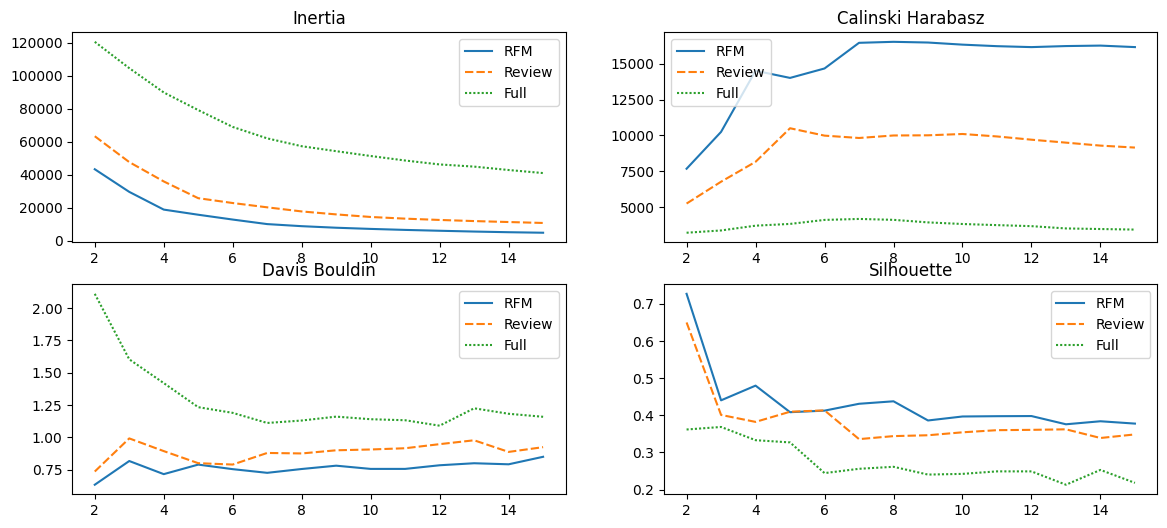

In [6]:
# Creation of plot and subplots for each score
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

sns.lineplot(data=inertia, ax=ax[0, 0])
ax[0, 0].title.set_text('Inertia')
sns.lineplot(data=ch_kmeans, ax=ax[0, 1])
ax[0, 1].title.set_text('Calinski Harabasz')
sns.lineplot(data=db_kmeans, ax=ax[1, 0])
ax[1, 0].title.set_text('Davis Bouldin')
sns.lineplot(data=s_kmeans, ax=ax[1, 1])
ax[1, 1].title.set_text('Silhouette')

In [7]:
# Fit of the best Kmeans for each dataset
best_km_rfm = KMeans(n_clusters=4).fit(X_std_rfm)
best_km_review = KMeans(n_clusters=5).fit(X_std_review)
best_km_full = KMeans(n_clusters=5).fit(X_std_full)

C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\octav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


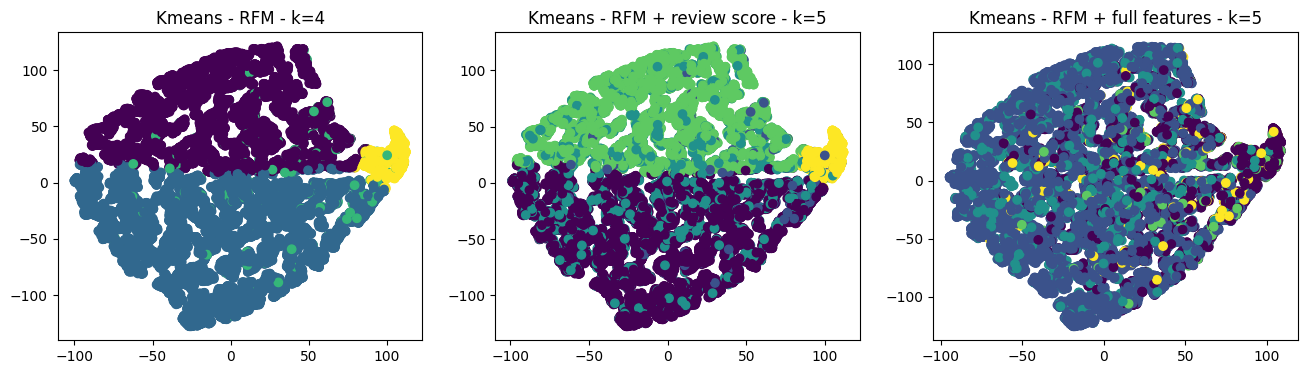

In [8]:
size_km_rfm = str(len(np.unique(best_km_rfm.labels_)))
size_km_review = str(len(np.unique(best_km_review.labels_)))
size_km_full = str(len(np.unique(best_km_full.labels_)))

# Creation of tSNE plot and subplots for each dataset
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].scatter(tsne_rfm[:, 0], tsne_rfm[:, 1], c=best_km_rfm.labels_)
axs[0].title.set_text('Kmeans - RFM - k=' + size_km_rfm)
axs[1].scatter(tsne_review[:, 0], tsne_review[:, 1], c=best_km_review.labels_)
axs[1].title.set_text('Kmeans - RFM + review score - k=' + size_km_review)
axs[2].scatter(tsne_full[:, 0], tsne_full[:, 1], c=best_km_full.labels_)
axs[2].title.set_text('Kmeans - RFM + full features - k=' + size_km_full)

plt.show()

# CAH

In [9]:
s_cah = pd.DataFrame(columns=['RFM', 'Review', 'Full'])
db_cah = pd.DataFrame(columns=['RFM', 'Review', 'Full'])
ch_cah = pd.DataFrame(columns=['RFM', 'Review', 'Full'])

for k in range(2, 16):
    print('Recherche pour k=', k)
    cah_rfm = AgglomerativeClustering(n_clusters=k).fit(X_std_rfm)
    cah_review = AgglomerativeClustering(n_clusters=k).fit(X_std_review)
    cah_full = AgglomerativeClustering(n_clusters=k).fit(X_std_full)

    s_cah.loc[k] = {'RFM': silhouette_score(X_std_rfm,
                                            cah_rfm.labels_),
                    'Review': silhouette_score(X_std_review,
                                               cah_review.labels_),
                    'Full': silhouette_score(X_std_full,
                                             cah_full.labels_)}
    db_cah.loc[k] = {'RFM': davies_bouldin_score(X_std_rfm,
                                                 cah_rfm.labels_),
                     'Review': davies_bouldin_score(X_std_review,
                                                    cah_review.labels_),
                     'Full': davies_bouldin_score(X_std_full,
                                                  cah_full.labels_)}
    ch_cah.loc[k] = {'RFM': calinski_harabasz_score(X_std_rfm,
                                                    cah_rfm.labels_),
                     'Review': calinski_harabasz_score(X_std_review,
                                                       cah_review.labels_),
                     'Full': calinski_harabasz_score(X_std_full,
                                                     cah_full.labels_)}

Recherche pour k= 2
Recherche pour k= 3
Recherche pour k= 4
Recherche pour k= 5
Recherche pour k= 6
Recherche pour k= 7
Recherche pour k= 8
Recherche pour k= 9
Recherche pour k= 10
Recherche pour k= 11
Recherche pour k= 12
Recherche pour k= 13
Recherche pour k= 14
Recherche pour k= 15


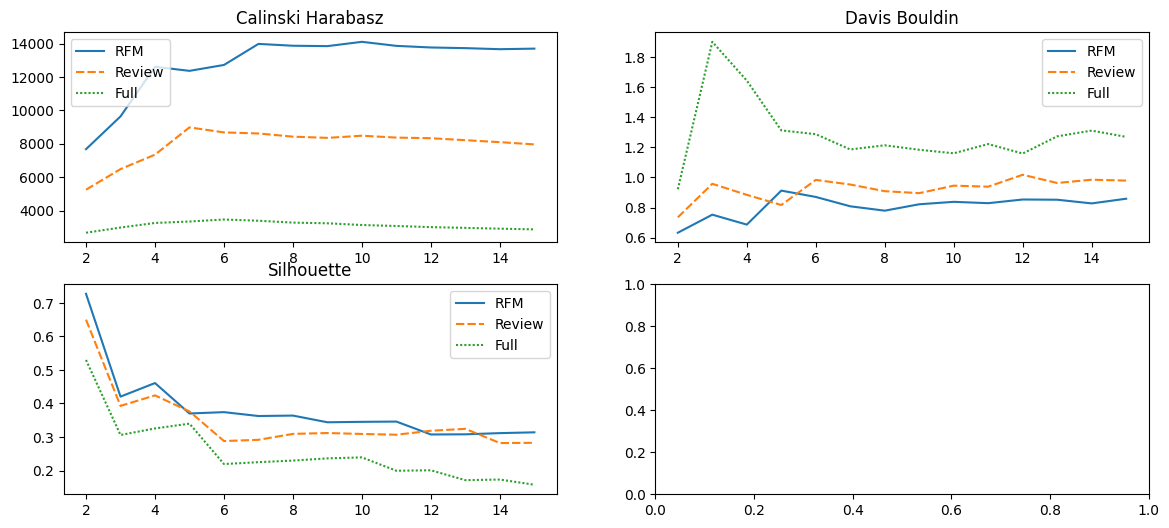

In [10]:
# Creation of plot and subplots for each score
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

sns.lineplot(data=ch_cah, ax=ax[0, 0])
ax[0, 0].title.set_text('Calinski Harabasz')
sns.lineplot(data=db_cah, ax=ax[0, 1])
ax[0, 1].title.set_text('Davis Bouldin')
sns.lineplot(data=s_cah, ax=ax[1, 0])
ax[1, 0].title.set_text('Silhouette')

In [11]:
# Fit of the best Kmeans for each dataset
best_cah_rfm = AgglomerativeClustering(n_clusters=4).fit(X_std_rfm)
best_cah_review = AgglomerativeClustering(n_clusters=5).fit(X_std_review)
best_cah_full = AgglomerativeClustering(n_clusters=5).fit(X_std_full)

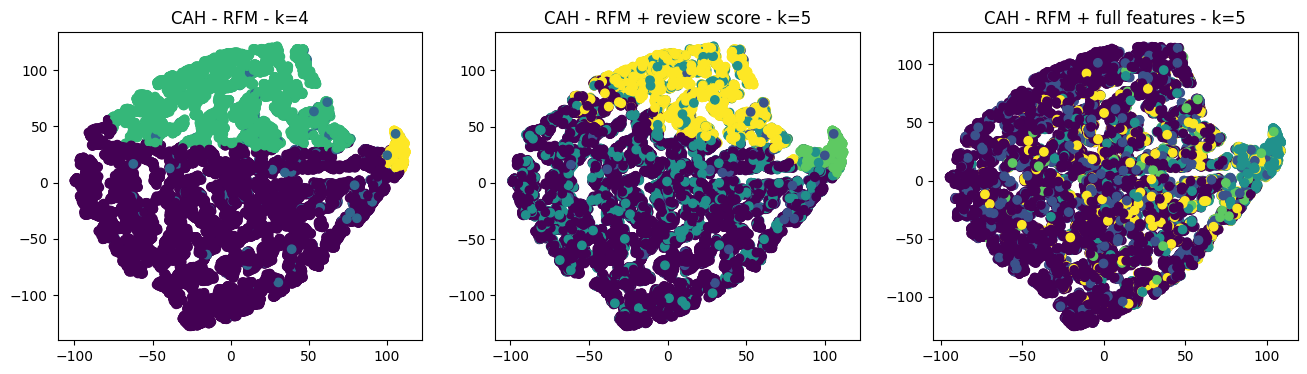

In [12]:
size_cah_rfm = str(len(np.unique(best_cah_rfm.labels_)))
size_cah_review = str(len(np.unique(best_cah_review.labels_)))
size_cah_full = str(len(np.unique(best_cah_full.labels_)))

# Creation of tSNE plot and subplots for each dataset
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].scatter(tsne_rfm[:, 0], tsne_rfm[:, 1], c=best_cah_rfm.labels_)
axs[0].title.set_text('CAH - RFM - k=' + size_cah_rfm)
axs[1].scatter(tsne_review[:, 0], tsne_review[:, 1], c=best_cah_review.labels_)
axs[1].title.set_text('CAH - RFM + review score - k=' + size_cah_review)
axs[2].scatter(tsne_full[:, 0], tsne_full[:, 1], c=best_cah_full.labels_)
axs[2].title.set_text('CAH - RFM + full features - k=' + size_cah_full)

plt.show()

## DBSCAN

In [13]:
# Parameters to test
param_grid = {
    'eps': np.logspace(-2, 1, 5),
    'min_samples': [2, 5, 10]
}

k = 0
s_db = pd.DataFrame(columns=['RFM', 'Review', 'Full'])
db_db = pd.DataFrame(columns=['RFM', 'Review', 'Full'])
ch_db = pd.DataFrame(columns=['RFM', 'Review', 'Full'])

# Browse parameter combinations
for params in ParameterGrid(param_grid):
    print("Parameters:", params)
    print("--------------------")

    # Create a DBSCAN model with the specified parameters
    dbscan = DBSCAN(**params)

    # Fit the model on scaled datasets
    db_rfm = dbscan.fit(X_std_rfm)
    db_review = dbscan.fit(X_std_review)
    db_full = dbscan.fit(X_std_full)

    print(f'rfm size : {np.unique(db_rfm.labels_).shape[0]}\n'
        f'review size: {np.unique(db_review.labels_).shape[0]}\n'
        f'full size: {np.unique(db_full.labels_).shape[0]}')

    # Skip case if there is only one cluster
    if np.unique(db_rfm.labels_).shape[0] > 1:

        s_db.loc[k] = {'RFM': silhouette_score(X_std_rfm,
                                               db_rfm.labels_),
                       'Review': silhouette_score(X_std_review,
                                                  db_review.labels_),
                       'Full': silhouette_score(X_std_full,
                                                db_full.labels_)}
        db_db.loc[k] = {'RFM': davies_bouldin_score(X_std_rfm,
                                                    db_rfm.labels_),
                        'Review': davies_bouldin_score(X_std_review,
                                                       db_review.labels_),
                        'Full': davies_bouldin_score(X_std_full,
                                                     db_full.labels_)}
        ch_db.loc[k] = {'RFM': calinski_harabasz_score(X_std_rfm,
                                                       db_rfm.labels_),
                        'Review': calinski_harabasz_score(X_std_review,
                                                          db_review.labels_),
                        'Full': calinski_harabasz_score(X_std_full,
                                                        db_full.labels_)}
        k = k + 1

Parameters: {'eps': 0.01, 'min_samples': 2}
--------------------
rfm size : 177
review size: 177
full size: 177
Parameters: {'eps': 0.01, 'min_samples': 5}
--------------------
rfm size : 1
review size: 1
full size: 1
Parameters: {'eps': 0.01, 'min_samples': 10}
--------------------
rfm size : 1
review size: 1
full size: 1
Parameters: {'eps': 0.05623413251903491, 'min_samples': 2}
--------------------
rfm size : 1426
review size: 1426
full size: 1426
Parameters: {'eps': 0.05623413251903491, 'min_samples': 5}
--------------------
rfm size : 101
review size: 101
full size: 101
Parameters: {'eps': 0.05623413251903491, 'min_samples': 10}
--------------------
rfm size : 5
review size: 5
full size: 5
Parameters: {'eps': 0.31622776601683794, 'min_samples': 2}
--------------------
rfm size : 769
review size: 769
full size: 769
Parameters: {'eps': 0.31622776601683794, 'min_samples': 5}
--------------------
rfm size : 130
review size: 130
full size: 130
Parameters: {'eps': 0.31622776601683794, '

26:9: E128 continuation line under-indented for visual indent
27:9: E128 continuation line under-indented for visual indent


rfm size : 1
review size: 1
full size: 1


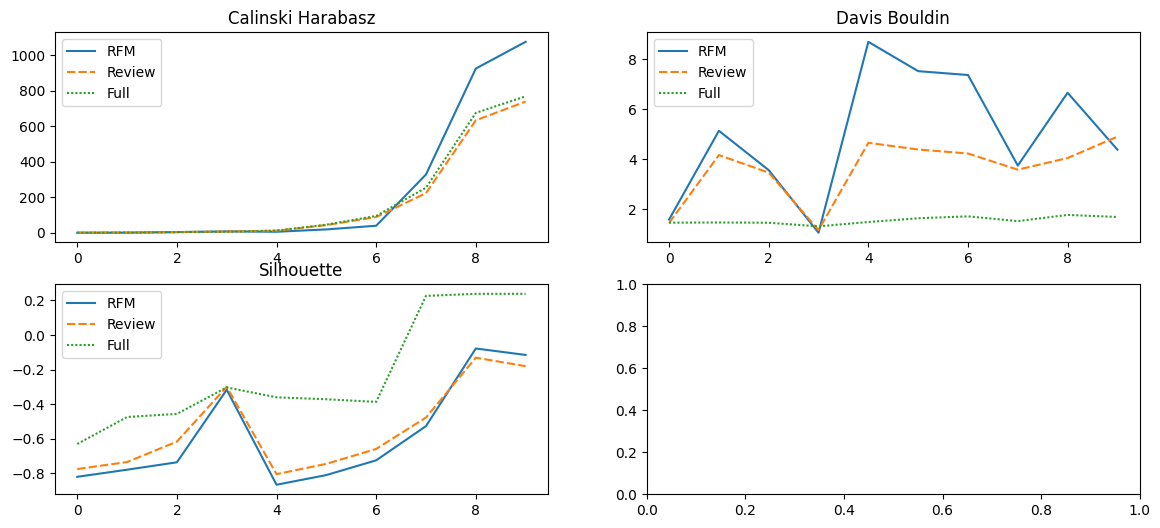

In [14]:
# Creation of plot and subplots for each score
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

sns.lineplot(data=ch_db, ax=ax[0, 0])
ax[0, 0].title.set_text('Calinski Harabasz')
sns.lineplot(data=db_db, ax=ax[0, 1])
ax[0, 1].title.set_text('Davis Bouldin')
sns.lineplot(data=s_db, ax=ax[1, 0])
ax[1, 0].title.set_text('Silhouette')

In [15]:
# Fit of the best Kmeans for each dataset
best_db_rfm = DBSCAN(eps=0.056, min_samples=5).fit(X_std_rfm)
best_db_review = DBSCAN(eps=0.056, min_samples=5).fit(X_std_review)
best_db_full = DBSCAN(eps=0.056, min_samples=5).fit(X_std_full)

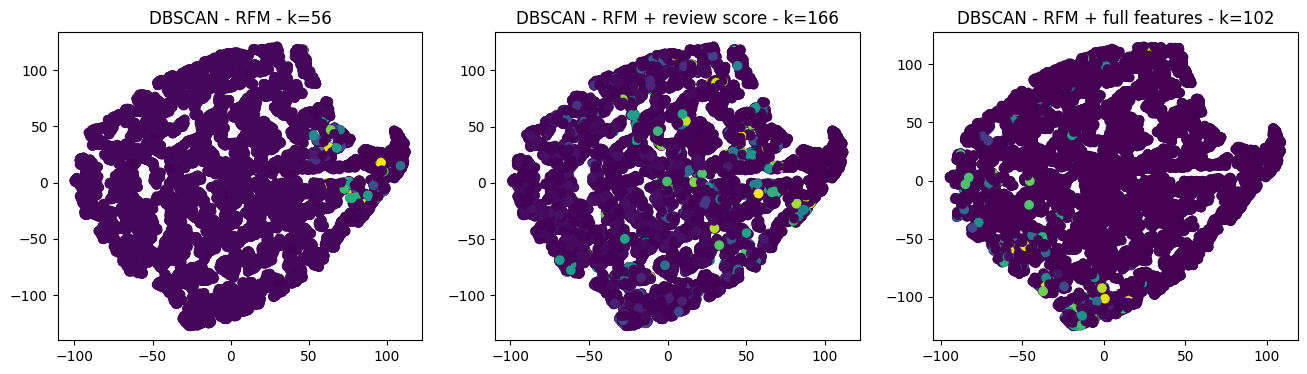

In [16]:
size_db_rfm = str(len(np.unique(best_db_rfm.labels_)))
size_db_review = str(len(np.unique(best_db_review.labels_)))
size_db_full = str(len(np.unique(best_db_full.labels_)))

# Creation of tSNE plot and subplots for each dataset
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].scatter(tsne_rfm[:, 0], tsne_rfm[:, 1], c=best_db_rfm.labels_)
axs[0].title.set_text('DBSCAN - RFM - k=' + size_db_rfm)
axs[1].scatter(tsne_review[:, 0], tsne_review[:, 1], c=best_db_review.labels_)
axs[1].title.set_text('DBSCAN - RFM + review score - k=' + size_db_review)
axs[2].scatter(tsne_full[:, 0], tsne_full[:, 1], c=best_db_full.labels_)
axs[2].title.set_text('DBSCAN - RFM + full features - k=' + size_db_full)

plt.show()

## Best model : KMeans

#  Datasets comparison
### For each datasets (rfm, rfm_review, rfm_full), t-SNE, clusters repartition and clusters interpretation comparison

In [17]:
# Create dataframe with labels included
km_rfm = sample_rfm.assign(label=best_km_rfm.labels_)
km_review = sample_review.assign(label=best_km_review.labels_)
km_full = sample_full.assign(label=best_km_full.labels_)

# Create scale dataframe grouped by labels
km_std_rfm = (
    pd.DataFrame(X_std_rfm, columns=sample_rfm.iloc[:, 1:4].columns)
    .assign(label=best_km_rfm.labels_)
    .groupby('label')
    .mean()
)
km_std_review = (
    pd.DataFrame(X_std_review, columns=sample_review.iloc[:, 1:5].columns)
    .assign(label=best_km_review.labels_)
    .groupby('label')
    .mean()
)
km_std_full = (
    pd.DataFrame(X_std_full, columns=sample_full.iloc[:, 1:8].columns)
    .assign(label=best_km_full.labels_)
    .groupby('label')
    .mean()
)

In [18]:
def dataset_comparison(algo_name: str,
                       datasets: dict,
                       tSNE: dict,
                       X_std: dict):
    '''Function for representing bareplot repartition, radar plot
    interpretation and t-SNE vizualisation of clusterings.
    Datasets in inputs are converting to subplots.'''

    num_rows = len(datasets) * 3

    fig = plt.figure(figsize=(18, 50))

    for key, df in datasets.items():
        i = list(datasets.keys()).index(key)
        size = str(df.groupby('label')['customer_unique_id'].count().count())

        row = i // 3  # rows & cols
        col = i % 3  # calculation for subplots

        ax1 = fig.add_subplot(num_rows, 3, i*3 + 1)
        ax2 = fig.add_subplot(num_rows, 3, i*3 + 2)
        ax3 = fig.add_subplot(num_rows, 3, i*3 + 3, polar=True)

        # Barplot for repartition in clusters
        ax1.bar(height=df.groupby('label')['customer_unique_id'].count(),
                x=df['label'].unique())
        ax1.title.set_text(algo_name + ' - ' + key + ' - k=' + size)

        # tSNE visualisation
        ax2.scatter(tSNE[key][:, 0], tSNE[key][:, 1], c=df['label'])
        ax2.title.set_text(algo_name + ' - ' + key + ' - k=' + size)

        # Radar plot for interpretation of clusters
        # Preparation of angles
        categories = X_std[key].columns
        categories = [*categories, categories[0]]

        num_categories = X_std[key].shape[1]
        angles = np.linspace(0, 2 * np.pi,
                             num_categories,
                             endpoint=False).tolist()
        angles += angles[:1]

        # Prepare values for closed circle
        values = X_std[key].values
        values = np.concatenate((values, values[:, 0].reshape(-1, 1)), axis=1)

        for i, value in enumerate(values):
            ax3.plot(angles, value, label='Cluster' + str((i+1)))
        lines, labels = plt.thetagrids(np.degrees(angles), labels=categories)
        ax3.title.set_text(algo_name + ' - ' + key + ' - k=' + size)
        ax3.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

    plt.tight_layout()
    plt.show()

In [19]:
def radar_plot(algo_name: str,
               X_std: dict):
    '''Function for representing radar plot only for zoom in
    clustering interpretation.'''

    num_rows = len(X_std)

    fig = plt.figure(figsize=(18, 18))

    for key, X in X_std.items():
        i = list(X_std.keys()).index(key)

        col = i % num_rows  # cols calculation for subplots

        ax = fig.add_subplot(3, 1, i + 1, polar=True)

        # Radar plot for interpretation of clusters
        # Preparation of angles
        categories = X.columns
        categories = [*categories, categories[0]]

        num_categories = X.shape[1]
        angles = np.linspace(0, 2 * np.pi,
                             num_categories,
                             endpoint=False).tolist()
        angles += angles[:1]

        # Prepare values for closed circle
        values = X.values
        values = np.concatenate((values, values[:, 0].reshape(-1, 1)), axis=1)

        for i, value in enumerate(values):
            ax.plot(angles, value, label='Cluster' + str((i+1)))
        lines, labels = plt.thetagrids(np.degrees(angles), labels=categories)
        ax.title.set_text(algo_name + ' - ' + key)
        ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

    plt.tight_layout()
    plt.show()

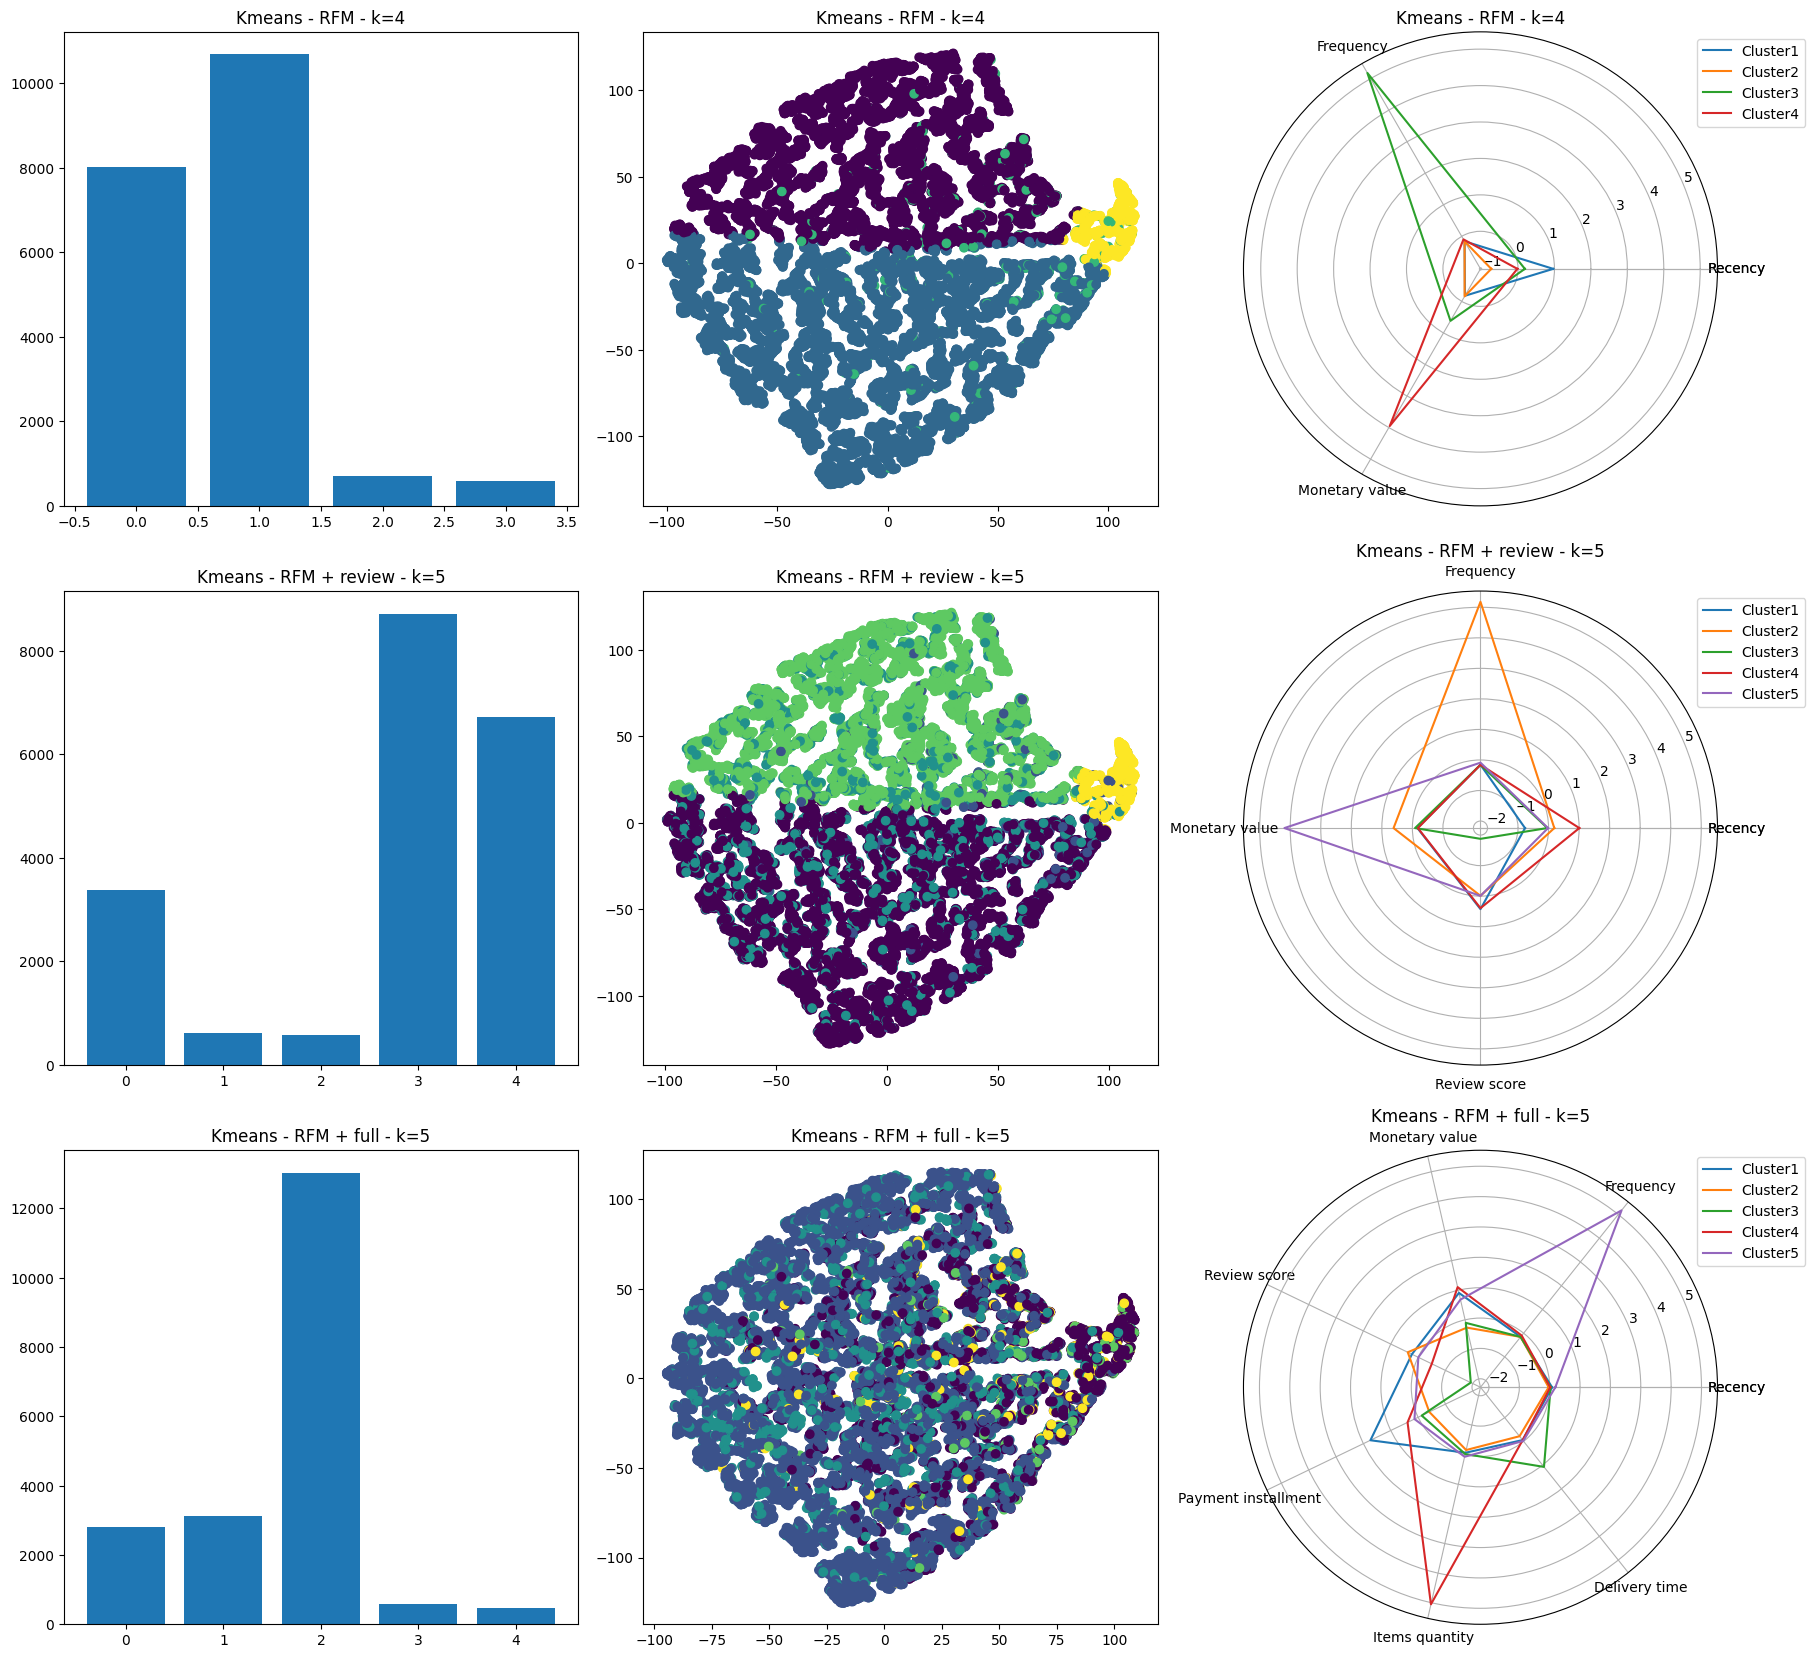

In [20]:
dataset_comparison('Kmeans',
                   {'RFM': km_rfm,
                    'RFM + review': km_review,
                    'RFM + full': km_full},
                   {'RFM': tsne_rfm,
                    'RFM + review': tsne_review,
                    'RFM + full': tsne_full},
                   {'RFM': km_std_rfm,
                    'RFM + review': km_std_review,
                    'RFM + full': km_std_full})

The RFM dataset seems logically distributed with 4 distincts. The difference in distribution between the clusters is explained by a majority of customers having made only one purchase  
The RFM review dataset seems as logically distributed as RFM, with an additional split of one cluster into two.  
The RFM full dataset seems to have a cluster that stands out for the number of clients in it.

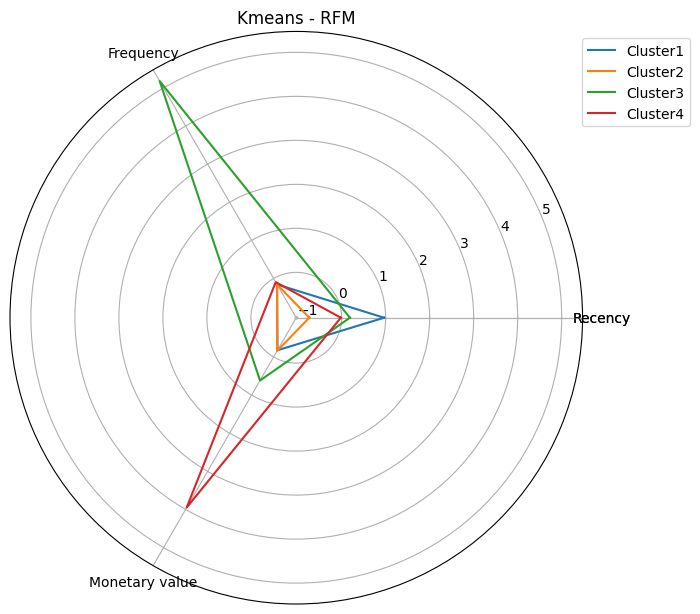

In [21]:
radar_plot('Kmeans', {'RFM': km_std_rfm})

Cluster1 : Gros acheteur (occasionel)  
Cluster2 : Acheteur "classique"  
Cluster3 : Acheteur récent  
Cluster4 : Acheteur régulier  

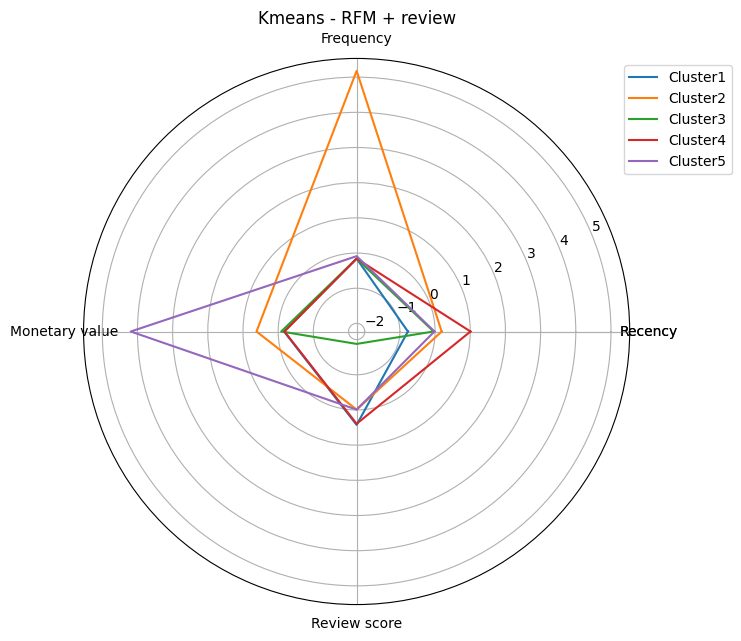

In [22]:
radar_plot('Kmeans', {'RFM + review': km_std_review})

Cluster1 : Gros acheteur (occasionel)  
Cluster2 : Acheteur "classique"  
Cluster3 : Acheteur mécontent  
Cluster4 : Acheteur récent  
Cluster5 : Acheteur régulier  

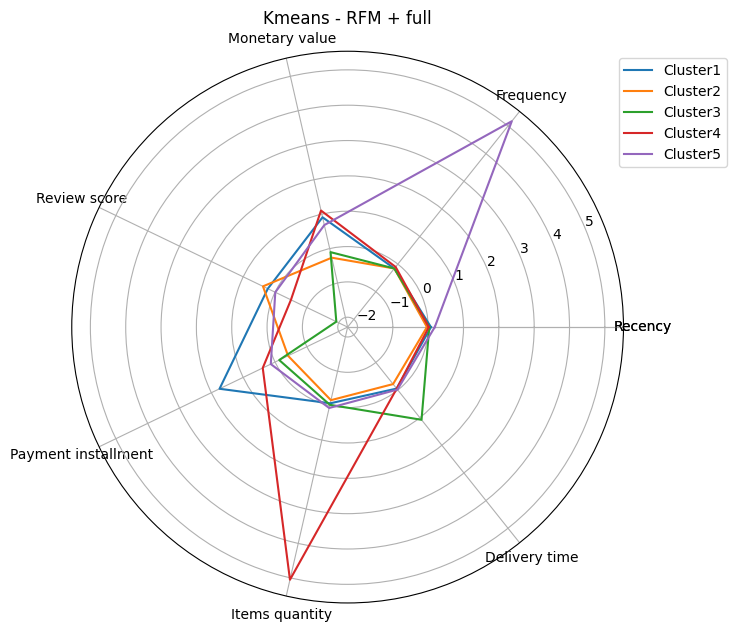

In [23]:
radar_plot('Kmeans', {'RFM + full': km_std_full})

Cluster1 : Acheteur en quantité  
Cluster2 : Acheteur "classique" content  
Cluster3 : Gros acheteur (occasionnel)  
Cluster4 : Acheteur mécontent (délai long)  
Cluster5 : Acheteur régulier  

# Conclusion

KMeans (k=5) meilleur modèle tant sur les scores que sur l'interprétation des clusters  
RFM review apporte suffisamment d'informations pour un clustering efficace (plus de clusters que RFM, et autant que RFM full)